In [1]:
# HIDDEN in jupyterbook 
#This is code to manage dependencies if the notebook is executed in the google colab cloud service
if 'google.colab' in str(get_ipython()):
  import os
  os.system('apt -qqq install graphviz')
  os.system('pip -qqq install ModelFlowIb ipysheet  --no-dependencies ')
  incolab = True  
else:
  incolab = False 

%load_ext autoreload
%autoreload 2

In [2]:
#%matplotlib notebook
%matplotlib inline

In [3]:
from modelclass import model 

In [4]:
import matplotlib.pyplot as plt # To manipulate plots 

In [5]:
# housekeeping for developement 
%load_ext autoreload   
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
model.widescreen() 

In [7]:
model.scroll_off()

In [8]:
mpak,baseline = model.modelload('../models/pak.pcim',run=1,silent=1,keep='Baseline')

file read:  C:\modelflow manual\papers\mfbook\content\models\pak.pcim


In [9]:
scenario_exo  =  baseline.upd("<2020 2100> PAKGGREVCO2CER PAKGGREVCO2GER PAKGGREVCO2OER = 29")

In [10]:
scenario = mpak(scenario_exo,2020,2100,keep=f'Coal, Oil and Gastax : 29') # runs the simulation

In [11]:
print(f'mpak.basedf: Dataframe: with {mpak.basedf.shape[0]} years and {mpak.basedf.shape[1]} variables')
print(f'mpak.lastdf: Dataframe: with {mpak.lastdf.shape[0]} years and {mpak.lastdf.shape[1]} variables')

mpak.basedf: Dataframe: with 121 years and 1290 variables
mpak.lastdf: Dataframe: with 121 years and 1290 variables


In [12]:
print('mpak.keep_solutions contains:')
for key,value in mpak.keep_solutions.items(): 
    print(f'key = {key:25}|Dataframe: {value.shape[0]} years and {value.shape[1]} variables')

mpak.keep_solutions contains:
key = Baseline                 |Dataframe: 121 years and 1290 variables
key = Coal, Oil and Gastax : 29|Dataframe: 121 years and 1290 variables


In [13]:
mpak.oldkwargs

{'silent': 1, 'alfa': 0.7, 'ldumpvar': 0, 'keep': 'Coal, Oil and Gastax : 29'}

In [14]:
mpak.current_per

Index([2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031,
       2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043,
       2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055,
       2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067,
       2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079,
       2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091,
       2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100],
      dtype='int64')

In [15]:
scenario.index  # the index of the dataframe

Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       ...
       2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100],
      dtype='int64', length=121)

In [16]:
mpak.smpl(2020,2025)
mpak.current_per

Index([2020, 2021, 2022, 2023, 2024, 2025], dtype='int64')

In [17]:
print(f'Global time  before   {mpak.current_per}')
with mpak.set_smpl(2022,2023):
    print(f'Local time frame      {mpak.current_per}')
print(f'Unchanged global time {mpak.current_per}')

Global time  before   Index([2020, 2021, 2022, 2023, 2024, 2025], dtype='int64')
Local time frame      Index([2022, 2023], dtype='int64')
Unchanged global time Index([2020, 2021, 2022, 2023, 2024, 2025], dtype='int64')


In [18]:
print(f'Global time  before   {mpak.current_per}')
with mpak.set_smpl_relative (-1,0):
    print(f'Local time frame      {mpak.current_per}')
print(f'Unchanged global time {mpak.current_per}')

Global time  before   Index([2020, 2021, 2022, 2023, 2024, 2025], dtype='int64')
Local time frame      Index([2019, 2020, 2021, 2022, 2023, 2024, 2025], dtype='int64')
Unchanged global time Index([2020, 2021, 2022, 2023, 2024, 2025], dtype='int64')


In [19]:
with mpak.set_smpl(2020,2100):
    mpak['PAKNYGDPMKTPKN'].difpctlevel.mul100.rename().plot(colrow=1,
                title='Difference to baseline in percent',top=0.8);

In [20]:
allendo = mpak['#ENDO']
# allendo.show

In [21]:
mpak.smpl(2020,2023);

In [22]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'] 

In [23]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].base.df 

,PAKNYGDPMKTPKN,PAKNECONPRVTKN
2020,2.627394e+07,2.367289e+07
2021,2.651137e+07,2.397282e+07
2022,2.668514e+07,2.416413e+07
2023,2.696308e+07,2.442786e+07


In [24]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].df

,PAKNYGDPMKTPKN,PAKNECONPRVTKN
2020,2.647002e+07,2.344055e+07
2021,2.676493e+07,2.366076e+07
2022,2.688965e+07,2.376966e+07
2023,2.708904e+07,2.395330e+07


In [25]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].show

In [26]:
mpak['PAKNYGDP??????'].names

['PAKNYGDPDISCCN',
 'PAKNYGDPDISCKN',
 'PAKNYGDPFCSTCN',
 'PAKNYGDPFCSTKN',
 'PAKNYGDPFCSTXN',
 'PAKNYGDPMKTPCD',
 'PAKNYGDPMKTPCN',
 'PAKNYGDPMKTPKD',
 'PAKNYGDPMKTPKN',
 'PAKNYGDPMKTPXN',
 'PAKNYGDPPOTLKN']

In [27]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].frml

PAKNYGDPMKTPKN : FRML <IDENT> PAKNYGDPMKTPKN = PAKNECONPRVTKN+PAKNECONGOVTKN+PAKNEGDIFTOTKN+PAKNEGDISTKBKN+PAKNEEXPGNFSKN-PAKNEIMPGNFSKN+PAKNYGDPDISCKN+PAKADAP*PAKDISPREPKN $
PAKNECONPRVTKN : FRML <DAMP,STOC> PAKNECONPRVTKN = (PAKNECONPRVTKN(-1)*EXP(PAKNECONPRVTKN_A+ (-0.2*(LOG(PAKNECONPRVTKN(-1))-LOG(1.21203101101442)-LOG((((PAKBXFSTREMTCD(-1)-PAKBMFSTREMTCD(-1))*PAKPANUSATLS(-1))+PAKGGEXPTRNSCN(-1)+PAKNYYWBTOTLCN(-1)*(1-PAKGGREVDRCTXN(-1)/100))/PAKNECONPRVTXN(-1)))+0.763938860758873*((LOG((((PAKBXFSTREMTCD-PAKBMFSTREMTCD)*PAKPANUSATLS)+PAKGGEXPTRNSCN+PAKNYYWBTOTLCN*(1-PAKGGREVDRCTXN/100))/PAKNECONPRVTXN))-(LOG((((PAKBXFSTREMTCD(-1)-PAKBMFSTREMTCD(-1))*PAKPANUSATLS(-1))+PAKGGEXPTRNSCN(-1)+PAKNYYWBTOTLCN(-1)*(1-PAKGGREVDRCTXN(-1)/100))/PAKNECONPRVTXN(-1))))-0.0634474791568939*DURING_2009-0.3*(PAKFMLBLPOLYXN/100-((LOG(PAKNECONPRVTXN))-(LOG(PAKNECONPRVTXN(-1)))))) )) * (1-PAKNECONPRVTKN_D)+ PAKNECONPRVTKN_X*PAKNECONPRVTKN_D $


In [28]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].rename().df

,Real GDP,HH. Cons Real
2020,2.647002e+07,2.344055e+07
2021,2.676493e+07,2.366076e+07
2022,2.688965e+07,2.376966e+07
2023,2.708904e+07,2.395330e+07


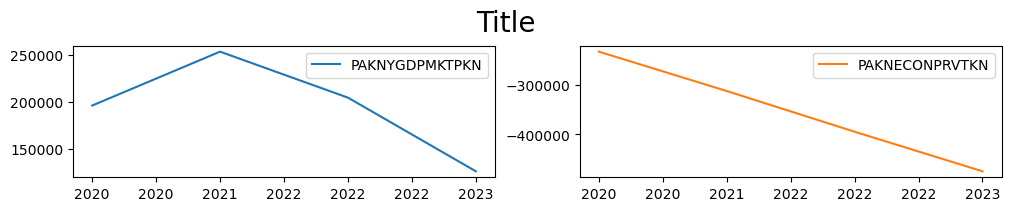

In [29]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].dif.plot()

In [30]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].pct.plot();

In [31]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].difpct.plot() ; 

In [32]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].difpctlevel.plot();  

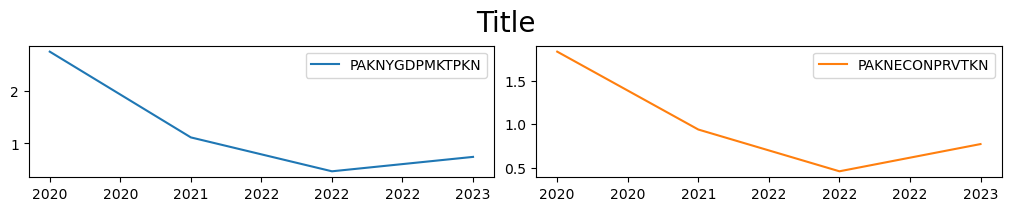

In [33]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].pct.mul100.plot() 

In [34]:
mpak.smpl(2020,2100);

mpak['PAKNYGDP??????'].rename().plot();

In [35]:
mpak['PAKNYGDP??????'].difpct.mul100.rename().plot(title='GDP growth ',top = 0.92);

In [36]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN PAKNEGDIFTOTKN'].\
difpctlevel.mul100.rename().\
plot(title='Components of GDP in pct of baseline',colrow=1,top=0.90,kind='bar') ;


In [37]:
with mpak.set_smpl(2020,2030):
    heatmap = mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].pct.rename().mul100.heat(title='Growth rates',annot=True,dec=1,size=(10,3))  


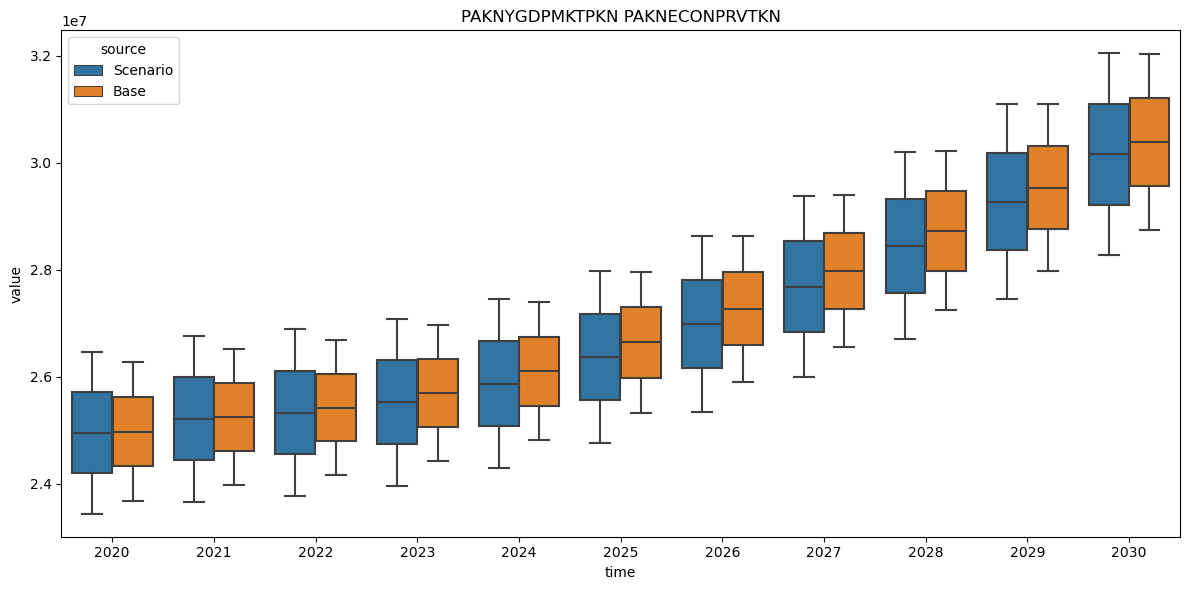

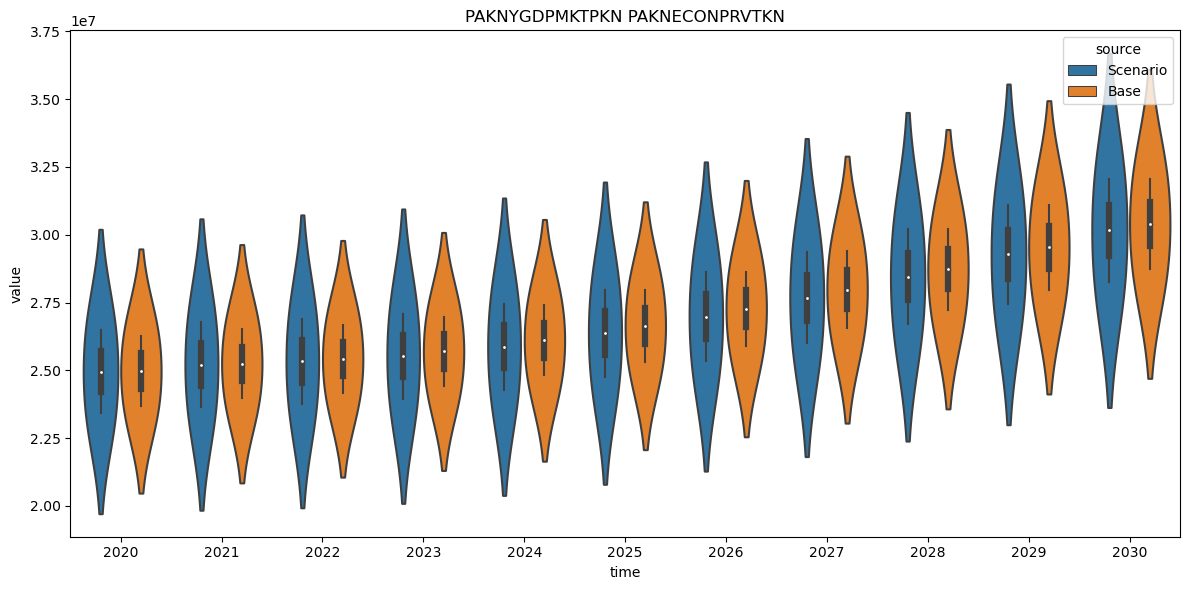

In [38]:
with mpak.set_smpl(2020,2030): 
    mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].difpct.box()  
    mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].difpct.violin()  


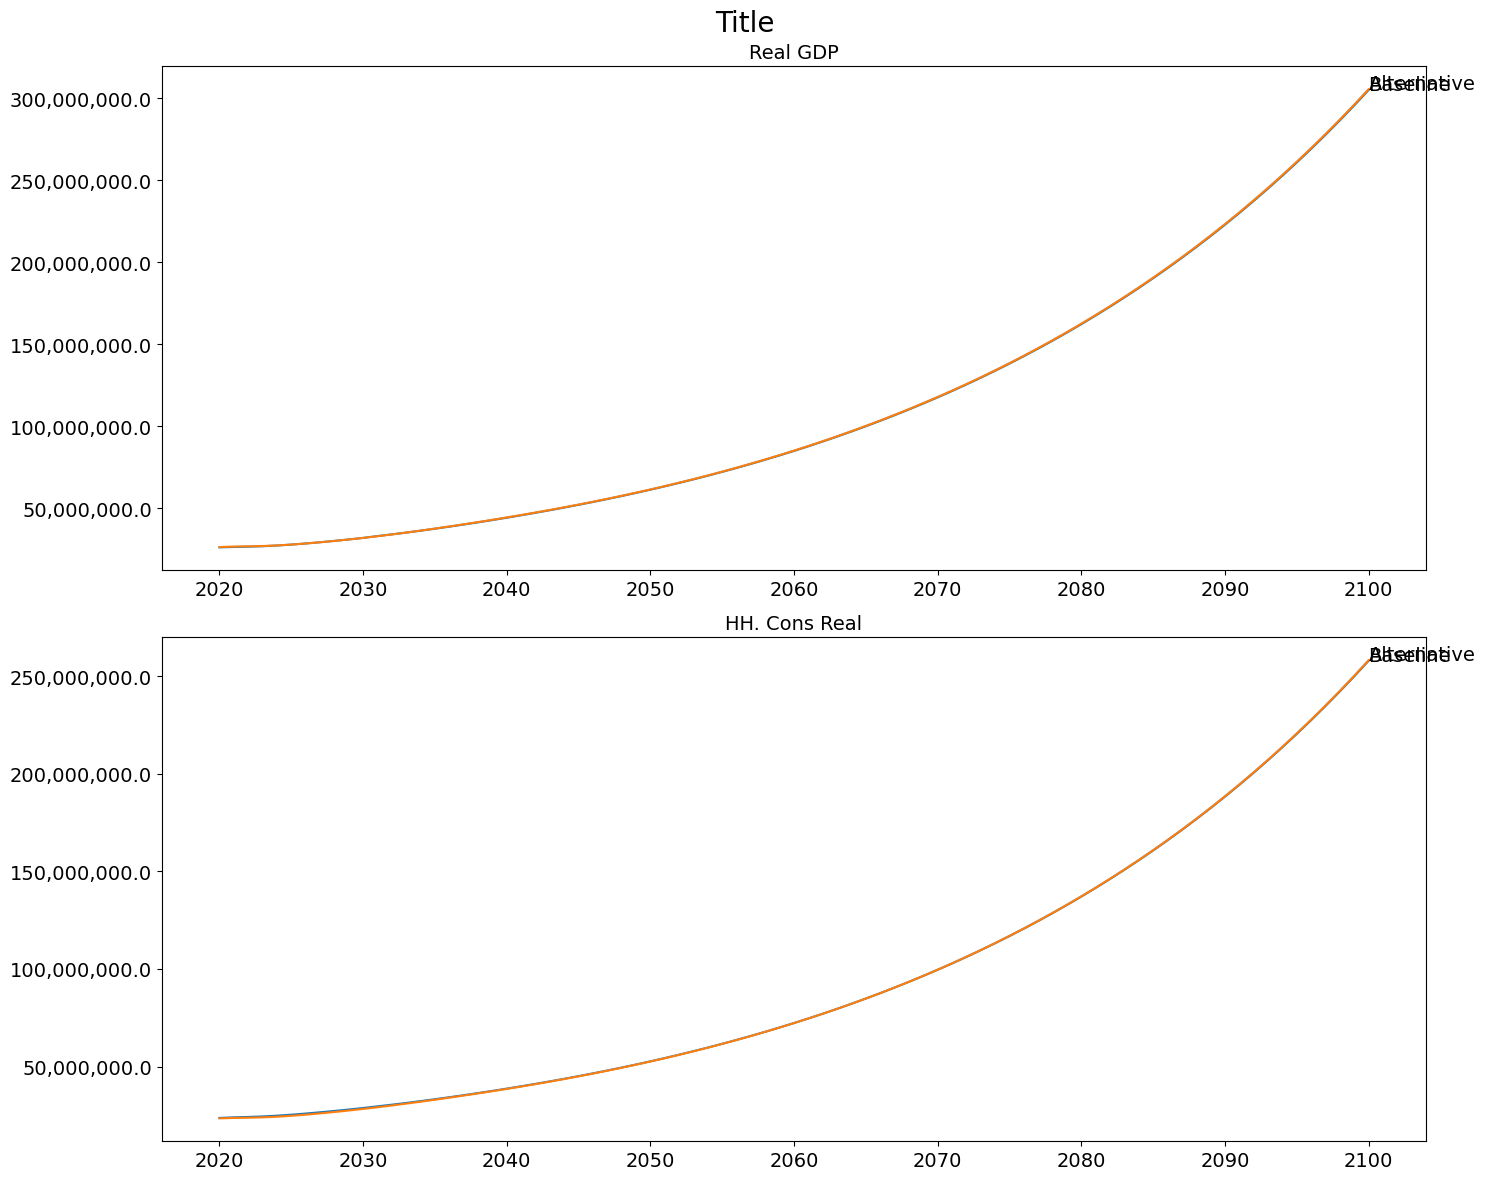

In [39]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].plot_alt() ;

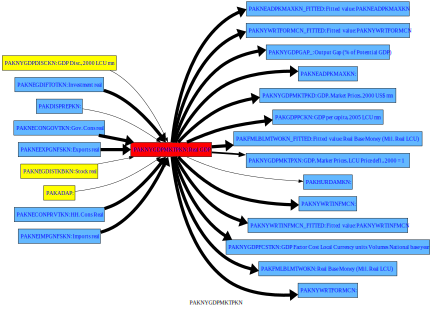

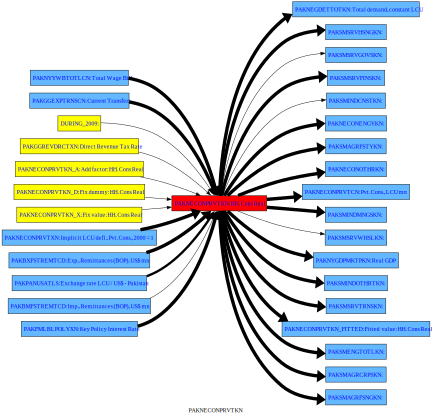

In [40]:
mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].draw(up=1,down=1)  # diagram of all direct dependencies 

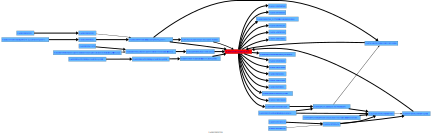

In [41]:
mpak['PAKNECONPRVTKN'].draw(up=3,down=1,filter=20)  

In [42]:
with mpak.set_smpl(2021,2025):
    mpak['PAKNYGDPMKTPKN PAKNECONPRVTKN'].dekomp()  # frml attribution 


Formula        : FRML <IDENT> PAKNYGDPMKTPKN = PAKNECONPRVTKN+PAKNECONGOVTKN+PAKNEGDIFTOTKN+PAKNEGDISTKBKN+PAKNEEXPGNFSKN-PAKNEIMPGNFSKN+PAKNYGDPDISCKN+PAKADAP*PAKDISPREPKN $ 

                       2021        2022        2023        2024        2025
Variable    lag                                                            
Base        0   26511370.41 26685141.87 26963077.57 27393200.36 27963231.53
Alternative 0   26764926.87 26889649.52 27089036.50 27454422.35 27979057.19
Difference  0     253556.46   204507.65   125958.93    61221.99    15825.66
Percent     0          0.96        0.77        0.47        0.22        0.06

 Contributions to differende for  PAKNYGDPMKTPKN
                         2021       2022       2023       2024       2025
Variable       lag                                                       
PAKNECONPRVTKN 0   -312052.97 -394466.14 -474558.93 -531755.17 -563616.01
PAKNECONGOVTKN 0    303335.99  268694.45  232506.87  209988.19  197439.80
PAKNEGDIFTOTKN 0    

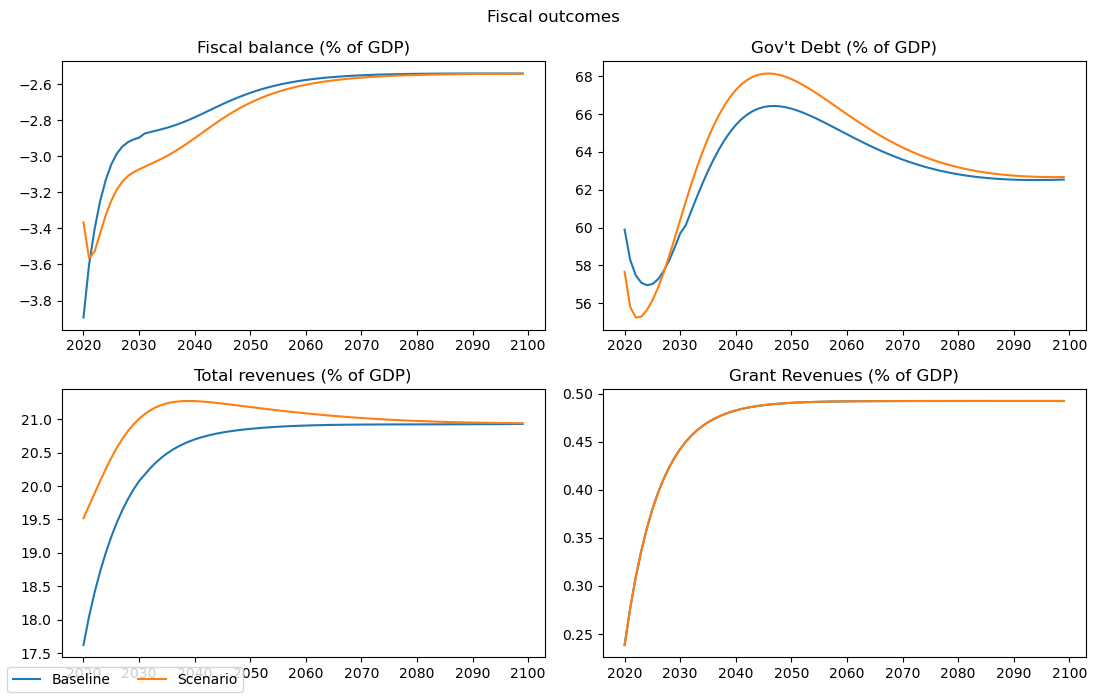

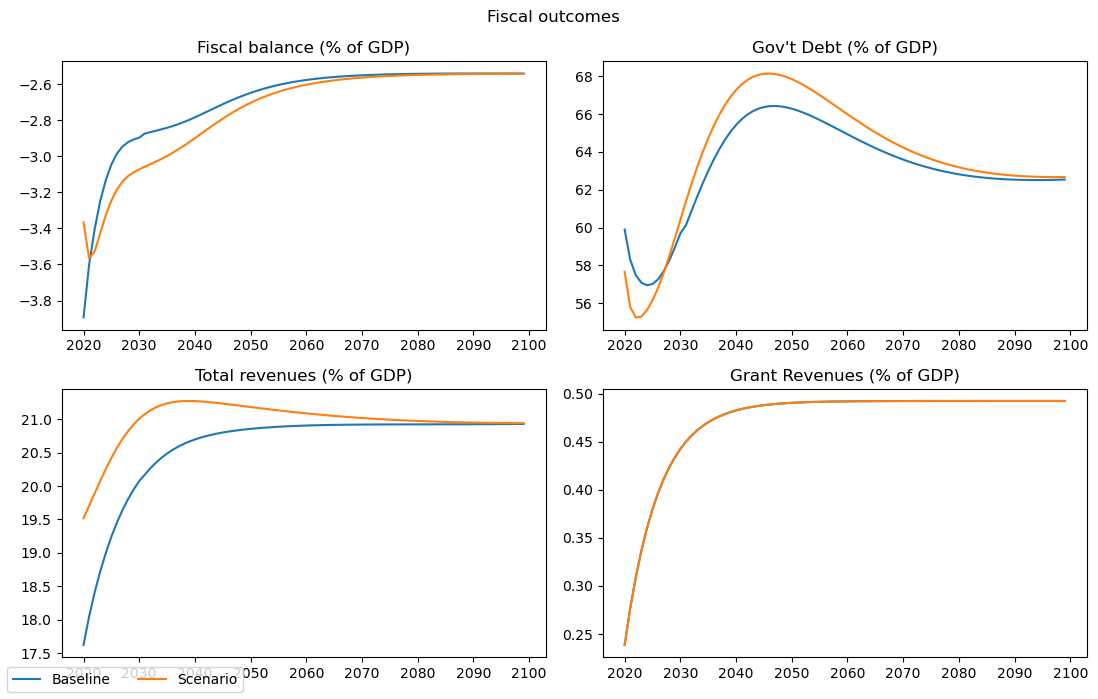

In [43]:
figure,axs= plt.subplots(2,2,figsize=(11, 7))
axs[0,0].plot(mpak.basedf.loc[2020:2099,'PAKGGBALOVRLCN_'],label='Baseline')
axs[0,0].plot(mpak.lastdf.loc[2020:2099,'PAKGGBALOVRLCN_'],label='Scenario')
#axs[0,0].legend()

axs[0,1].plot(mpak.basedf.loc[2020:2099,'PAKGGDBTTOTLCN_'],label='Baseline')
axs[0,1].plot(mpak.lastdf.loc[2020:2099,'PAKGGDBTTOTLCN_'],label='Scenario')

axs[1,0].plot(mpak.basedf.loc[2020:2099,'PAKGGREVTOTLCN']/mpak.basedf.loc[2020:2099,'PAKNYGDPMKTPCN']*100,label='Baseline')
axs[1,0].plot(mpak.lastdf.loc[2020:2099,'PAKGGREVTOTLCN']/mpak.lastdf.loc[2020:2099,'PAKNYGDPMKTPCN']*100,label='Scenario')

axs[1,1].plot(mpak.basedf.loc[2020:2099,'PAKGGREVGRNTCN']/mpak.basedf.loc[2020:2099,'PAKNYGDPMKTPCN']*100,label='Baseline')
axs[1,1].plot(mpak.lastdf.loc[2020:2099,'PAKGGREVGRNTCN']/mpak.lastdf.loc[2020:2099,'PAKNYGDPMKTPCN']*100,label='Scenario')
#axs2[4].plot(mpak.lastdf.loc[2000:2099,'PAKGGREVGRNTCN']/mpak.basedf.loc[2000:2099,'PAKNYGDPMKTPCN']*100,label='Scenario')

axs[0,0].title.set_text("Fiscal balance (% of GDP)")
axs[0,1].title.set_text("Gov't Debt (% of GDP)")
axs[1,0].title.set_text("Total revenues (% of GDP)")
axs[1,1].title.set_text("Grant Revenues (% of GDP)")
figure.suptitle("Fiscal outcomes")

plt.figlegend(['Baseline','Scenario'],loc='lower left',ncol=5)  
figure.tight_layout(pad=2.3) #Ensures legend does not overlap dates
figure